# Supernode

**Author** : Saman Hooshvar

Contact : saman.hooshvarfeyzabadi@mail.um.ac.ir

## What is supernode?

A **supernode** is basically a theoretical model in which we consider two non-reference nodes having **an ideal voltage source present between them** ($ N_1$ and $ N_2$ in our case), as a single node. In simple terms, we combine those two non-reference nodes to make a single node called a “supernode”.

## Comparing nodal analysis and supernode method

### Example 1:

Consider the network shown below. Let's try to find the branch currents, using the nodal analysis method, following the same steps as we followed in the KCL tutorial.

![circuit](supernode-analysis-problem-1a.jpg.webp)

### Solving the problem using nodal analysis

**Step 1 :** Reviewing the network, we can see that we are given two resistors and two current sources, along with their values. But there's also a **voltage source of $ 2V$** present between the nodes **N1** and **N2**.

We'll assume that the voltages at the nodes N1 and N2 are $ V1$ and $ V2$ respectively. The current through the **2Ω resistor is $ I1$**

 and through the **1Ω resistor is $ I3$** , both flowing downwards.
 
The current **$ I2$** is flowing towards the right **from node N1 to node N2**, but if you notice, the branch has no resistance! The current is only passing through an ideal voltage source of $ 2V$. How do we know that it's an ideal voltage source? Because the voltage source has no series resistance. This is how we differentiate between an ideal and a practical voltage source.

**Step 2 :** Here we already have our reference node at the bottom of the network. So this step will not bother us at all.

**Step 3 :** Let's try to write down the branch current equations for the three currents $ I1$, $ I2$, and $ I3$.

$ I_1 = \frac{V_1 - 0}{2} = \frac{V_1}{2}$

$ I_3 = \frac{V_2 - 0}{1} = \frac{V_2}{1}$

$ I_2 = \frac{V_1 - V_2}{0} = ?$

We have a zero in the denominator of I2. That will make the value of I2 infinite. Obviously, we cannot have an infinite amount of current flowing through our network. **This is not the correct way to solve this problem**.

The branch current equations for $ I_1$ and $ I_3$ are valid and can be used as is. But for $I_2$, we don't have enough information at this moment to find the exact equation which would give us its value. So one thing we can do is to suppose the current I2 as some unknown term $ x$.

$ I_2 = x$

**Step 4 :** Applying nodal analysis at node N1 and putting in the expressions we obtained in the previous step, we get:

$ 3 = I_1 + I_2$

$ 3 = \frac{V_1}{2} + x$

Similarly for node $ N_2$, we'll get:

$ I_2 = I_3 + 2$

$ x = \frac{V_2}{1} + 2$

You can see that we have the term x in both the node equations. so we can take the value of x from the second equation and put it into the first one to get this:

$ 3 = \frac{V_1}{2} + (\frac{V_2}{1} + 2)$

by simplyfing it we have:

$ 1 - \frac{V_1}{2} - \frac{V_2}{1} = 0$

we have two unknowns in this equation, that's why we need a second equation

we can easily get that from the branch containing the ideal voltage source. As you can see in the network, the potential at node N1 is $2V$ greater than the potential at node $N_2$, which can be written as:

$ V_1 - V_2 = 2$

**Step 5 :** We finally have two unknowns and also two equations. Now we just need to do some basic math and we can get the values of $ V_1$ and $ V_2$.

$ V_1 = 2V$

$ V_2 = 0V$

### Solving the problem using supermesh method

Let’s redraw the same network, but this time we’ll do some modifications to suit our needs.

![supernode](supernode-analysis-problem-1b.jpg.webp)

Let’s apply nodal analysis to the supernode we’ve just created to get a common node equation. We can see that 3A is moving towards the supernode and the rest of the currents are moving away from the supernode. We can write it as,

$ 3 = I_1 + I_3 + 2$

And we know from ohm's law that:

$ I_1 = \frac{V_1}{2}$

$ I_3 = \frac{V_2}{1}$

we can rewrite the equation as:

$ 3 = \frac{V_1}{2} + (\frac{V_2}{1} + 2)$

By simplyfing it we have:

$ 1 - \frac{V_1}{2} - \frac{V_2}{1} = 0$

which is the same as we got from nodal analysis.

we also need another equation which we can write from whitin our supernode:

$ V_1 - V_2 = 2$

Solving the equations:

$ 1 - \frac{V_1}{2} - \frac{V_2}{1} = 0$

$ \frac{V_1 + 2V_2}{2} = 1$

$ V_1 + 2V_2 = 2$

Rearranging the terms in the second equation to get $V_1$:

$V_1 = 2 + V_2$

So that we can substitute it in the first equatio:

$ (2 + V_2)+ 2V_2 = 2$

$ V_2 = 0V$

Placing this value in the second equation:

$V_1 = 2 + V_2$

$V_1 = 2V$

and for $I_1$ to $I_3$ we have:

$I_1 = 1A$

$ I_2 = 2A$

$ I_3 = 0A$



### Drawing the circuit using Schemdraw

Below is an implementation of the circuit using shemedraw.

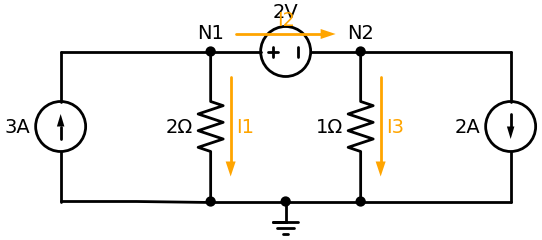

In [9]:
import schemdraw
from schemdraw import elements as elm

with schemdraw.Drawing() as d:
    elm.SourceI().label('3A')
    elm.Line().right()
    N1 = elm.Dot().label('N1')
    V = elm.SourceV().right().reverse().label('2V')
    elm.CurrentLabel().at(V).label('I2').left().color('orange')
    N2 = elm.Dot().label('N2')
    elm.Line()
    elm.SourceI().down().label('2A')
    elm.Line().left()
    N3 = elm.Dot()
    elm.Line().length(d.unit/2)
    elm.Dot()
    elm.Ground()
    elm.Line().length(d.unit/2)
    N4 = elm.Dot()
    elm.Line()
    R2 = elm.Resistor().endpoints(N1.start , N4.start).label('2Ω')
    elm.CurrentLabel().at(R2).label('I1').color('orange')
    R1 = elm.Resistor().endpoints(N2.start , N3.start).label('1Ω')
    elm.CurrentLabel().at(R1).label('I3').color('orange')


### Solving the circuit using PySpice

Below is an implementation to find the voltages in $N1$ and $N2$ using Pyspice.

In [10]:
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *

# Initialize the circuit
circuit = Circuit("Correct Circuit")

# Define voltage source and current sources with explicit node labels
circuit.V(1, "N1","N2", 2@u_V)    # 2V voltage source between N1 and ground
circuit.I(1, circuit.gnd , "N1", 3@u_A)           # 3A current source into N1
circuit.I(2, "N2", circuit.gnd, 2@u_A)    # 2A current source from N2 to ground

# Define resistors based on the diagram
circuit.R(1, "N1", circuit.gnd, 2@u_Ohm)         # 2Ω resistor between N1 and N2
circuit.R(2, "N2", circuit.gnd, 1@u_Ohm)  # 1Ω resistor between N2 and ground

# Perform DC operating point analysis
from PySpice.Spice.Simulation import OperatingPointAnalysisParameters

simulator = circuit.simulator(temperature=25, nominal_temperature=25)
try:
    analysis = simulator.operating_point()

    # Output voltages at N1 and N2
    voltage_N1 = float(analysis["N1"][0])
    voltage_N2 = float(analysis["N2"][0])

    print(f"Voltage at N1: {voltage_N1} V")
    print(f"Voltage at N2: {voltage_N2} V")
except Exception as e:
    print(f"An error occurred during simulation: {e}")


Voltage at N1: 2.0 V
Voltage at N2: 0.0 V


## Example 2:

The previous problem was fairly easy. Let's take another one, upping the complexity of the network. Once again, our task is to find all the branch currents, $I_1, I_2, I_3, I_4$ , and I5. Take some time to review the network and figure out what can be done.

![hard-circuit](supernode-analysis-problem-2a.jpg.webp)

### Solution

**Step 1 :**We,ll assume that the voltages at the nodes N1, N2, and N3 are $V_1, V_2$, and $V_3$ respectively.

However, this time there are two ideal voltage sources present in our network. A 10V ideal voltage source is present between node N3 and the reference node.because it is connected between a reference and a non-reference node. In this case, we can directly write that the **voltage at N3 or $V_3$ is $10V$**.

But if we talk about the second ideal voltage source of 5V, it is connected between nodes N1 and N2. And because N1 and N2 are non-reference nodes, they form a supernode. So this time we don't need to follow the longer method of solving the problem, instead, we can directly solve it using the supernode method.

![hard-circuit-supernode](supernode-analysis-problem-2b.jpg.webp)

**Step 3 :** After considering the supernode, we can write the branch currents as

$I_1 = \frac{10 - v_1}{2} $

$I_2 = \frac{V_1}{8}$

$ I_3 = \frac{10 - V_2}{4}$

$I_4 = \frac{V_2}{6} $

**Step 4 :** Now that we've obtained the expressions for all the branch currents entering and leaving the supernode, we can write a common nodal equation for the supernode as:

$I_1 + I_3 = I_2 + I_4 $

Replacing the currents with their expressions we obtained in the previous step, we get:

$\frac{10-V_1}{2} + \frac{10 - V_2}{4} = \frac{V_1}{8} + \frac{V_2}{6} $

By simplyfing it we have:

$7.5 = V_1(\frac{1}{8} + \frac{1}{2}) + V_2(\frac{1}{6} + \frac{1}{4}) $

That's one out of the two required equations. The second equation will be obtained from the branch which has the 5V voltage source(supernode branch),

$V_1 - V_2 = 5$

**Step 5 :**Now that we have both the equations, we'll solve it and we get the values of $V1$ and $V2$:

$V_1 = 9.199V ≈ 9.2V$

$V_2 = 4.199V ≈ 4.2V$

Now we have everything we need to find out the currents in the branches of the network. We just need to plug in the values of V1 and V2 in the branch current equations obtained in step 3 to get the values of currents:

$I_1 = 0.4A$

$I_2 = 1.15A$

$I_3 = 1.45A$

$I_4 = 0.7A$

The only thing left to do now is to apply nodal analysis on any one of the two nodes, N1 and N2, of the network to obtain the current through the 5V voltage source.

![last-step](supernode-analysis-problem-2c.jpg.webp)

We can see it from the figure that:

$I_1 = I_2 + I_5$

$I_5 = 0.4 - 1.15$

$I_5 = -0.75A$

What does this negative sign indicate? It means that the current $I_5$ flows in the direction opposite to the marked direction.(the current flows from N2 towards N1)

### Solving the circuit using PySpice

Below is an implementation to find the voltages in $N1$ to $N3$ and also $I_1$ to $I_5$ using Pyspice.

In [11]:
from PySpice.Probe.Plot import plot
from PySpice.Spice.Library import SpiceLibrary
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *

# Initialize the circuit
circuit = Circuit('Sample Circuit')

# Define the voltage sources
circuit.V(1, 'N3', circuit.gnd, 10@u_V)  # 10V source between N3 and ground
circuit.V(2, 'N1', 'N2', 5@u_V)  # 5V source between N1 and N2

# Define the resistors according to the diagram
circuit.R(1, 'N3', 'N1', 2@u_Ohm)  # 2Ω resistor between N3 and N1
circuit.R(2, 'N1', circuit.gnd, 8@u_Ohm)  # 8Ω resistor between N1 and ground
circuit.R(3, 'N3', 'N2', 4@u_Ohm)  # 4Ω resistor between N3 and N2
circuit.R(4, 'N2', circuit.gnd, 6@u_Ohm)  # 6Ω resistor between N2 and ground

# Run a DC analysis
from PySpice.Spice.Simulation import OperatingPointAnalysisParameters

simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.operating_point()

# Display the node voltages
print("Node Voltages:")
for node in ('N1', 'N2', 'N3'):
    print(f"Voltage at {node}: {float(analysis[node][0])} V")

# Calculate branch currents
print("\nBranch Currents:")

# Calculate I1 (current through the 2Ω resistor between N3 and N1)
I1 = (float(analysis['N3'][0]) - float(analysis['N1'][0])) / 2
print(f"I1: {I1} A")

# Calculate I2 (current through the 8Ω resistor between N1 and ground)
I2 = float(analysis['N1'][0]) / 8
print(f"I2: {I2} A")

# Calculate I3 (current through the 4Ω resistor between N3 and N2)
I3 = (float(analysis['N3'][0]) - float(analysis['N2'][0])) / 4
print(f"I3: {I3} A")

# Calculate I4 (current through the 6Ω resistor between N2 and ground)
I4 = float(analysis['N2'][0]) / 6
print(f"I4: {I4} A")

# Calculate I5 (current through the 5V source between N1 and N2)
I5 = (float(analysis['N1'][0]) - float(analysis['N2'][0])) / 5
print(f"I5: {I5} A")


Node Voltages:
Voltage at N1: 9.2 V
Voltage at N2: 4.2 V
Voltage at N3: 10.0 V

Branch Currents:
I1: 0.40000000000000036 A
I2: 1.15 A
I3: 1.45 A
I4: 0.7000000000000001 A
I5: 0.9999999999999998 A


### Example 3:

Determine the nodal voltages as labeled in the below circuit. making use of the supernode technique as appropriate.

![image](haytcircuit.png)


### Solution

Fisrt the nodal equation of V1 which we can write normally.

$ 3 -5 = \frac{V_1 - V_3}{1} + \frac{V_1 - V_2}{5} $ 

then beacuse of the voltage source between two other nodes we create a supernode from nodes 2 and 3. Then our nodal equation is:

$5-8 = \frac{V_2}{3} + \frac{V_2 - V_1}{5} + \frac{V_3}{2} + \frac{V_3 - V_1}{1} $

We also require a KVL equation that relates the two nodes involved in the supernode:

$V_2 - V_3 = 4$

Now we have 3 equations and 3 unknowns by solving them we have:

$V_1 = -8.6V$

$V_2 = -3.6V$

$V_3 = -7.6V$

### Solving the circuit using PySpice

Below is an implementation to find the voltages in $V_1$ to $V_3$ using Pyspice.

In [12]:
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *

# Initialize the circuit
circuit = Circuit('Corrected Circuit')

# Define the independent current sources as per the image
circuit.I(1, 'v1', circuit.gnd, 3@u_A)   # 3A source flowing from v1 to reference
circuit.I(2, 'v2', 'v1', 5@u_A)          # 5A source flowing from v2 to v1
circuit.I(3, circuit.gnd, 'v3', 8@u_A)   # 8A source flowing from reference to v3

# Define the resistors according to the diagram
circuit.R(1, 'v1', 'v2', 5@u_Ohm)        # 5Ω resistor between v1 and v2
circuit.R(2, 'v1', 'v3', 1@u_Ohm)        # 1Ω resistor between v1 and v3
circuit.R(3, 'v2', circuit.gnd, 3@u_Ohm) # 3Ω resistor between v2 and reference
circuit.R(4, 'v2', 'v3', 4@u_Ohm)        # 4Ω resistor between v2 and v3
circuit.R(5, 'v3', circuit.gnd, 2@u_Ohm) # 2Ω resistor between v3 and reference

# Define the voltage source with correct polarity between v2 and v3
circuit.V(1, 'v3', 'v2', 4@u_V)  # 4V source between v3 and v2

# Run a DC analysis
from PySpice.Spice.Simulation import OperatingPointAnalysisParameters

simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.operating_point()

# Display the node voltages
print("Node Voltages:")
for node in ('v1', 'v2', 'v3'):
    print(f"Voltage at {node}: {-float(analysis[node][0]):.2f} V")


Node Voltages:
Voltage at v1: -8.60 V
Voltage at v2: -3.60 V
Voltage at v3: -7.60 V


### Example 4:

Determine the node-to-reference voltages in the below circuit.

![hayt](haytcircuit2.png)

### Solution

After establishing a supernode around each voltage source, we see that 
we need to write KCL equations only at node 2 and at the supernode 
containing the dependent voltage source. By inspection, it is clear that 
$v_1 = −12 V.$

At node 2 we have:

$ \frac{v_2 - v_1}{0.5} + \frac{v_2 - v_3}{2} = 14 $

while at the 3–4 supernode we have:

$ \frac{v_3 - v_2}{2} + \frac{v_4}{1} + \frac{v_4 - v_1}{2.5} = 0.5v_x $

We next relate the source voltages to the node voltages:

$v_3 - v_4 = 0.2v_y$

and

$0.2v_y = 0.2(v_4 - v_1)$

Finally, we express the dependent current source in terms of the 
assigned variables:

$0.5v_x = 0.5(v_2 - v_1)$

Five nodes requires four KCL equations in general nodal analysis, 
but we have reduced this requirement to only two, as we formed 
two separate supernodes. Each supernode required a KVL equation.

Neither dependent source was controlled by a nodal voltage, so two additional 
equations were needed as a result.

With this done, we can now eliminate vx and vy to obtain a set of four 
equations in the four node voltages:

$-2v_1 + 2.5v_2 - 0.5v_3 = 14$

$0.1v_1 - v_2 + 0.5v_3 + 1.4v_4 = 0$

$ v_1 = -12$

$ 0.2v_1 + v_3 - 1.2v_4 = 0$

By solving it we have:

$v_1 = -12V$

$v_2 = 14.67V$

$v_3 = -2.67$

$v_4 = -1.33$

### Solving the circuit using PySpice

Below is an implementation to find the voltages in $V_1$ to $V_4$ using Pyspice.

In [13]:
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *

# Initialize the circuit
circuit = Circuit('Debugged Complex Circuit with Dependent Sources')

# Define the independent voltage source with reversed polarity
circuit.V(1, 'v1', circuit.gnd, 12@u_V)  # 12V source with ground connected to positive terminal

# Define the independent current source
circuit.I(1, 'v4', 'v2', 14@u_A)  # 14A source from v4 to v2

# Define the resistors
circuit.R(1, 'v2', 'v1', 0.5@u_Ohm)      # 0.5Ω between v1 and v2
circuit.R(2, 'v2', 'v3', 2@u_Ohm)        # 2Ω between v2 and v3
circuit.R(3, 'n_aux', 'v1', 2.5@u_Ohm)   # 2.5Ω between v1 and v4 (through auxiliary node n_aux)
circuit.R(4, 'v4', 'v3', 1@u_Ohm)        # 1Ω between v4 and v3

# Insert a zero-volt voltage source in series with the 2.5Ω resistor to measure current for CCCS
circuit.V('aux', 'n_aux', 'v4', 0@u_V)  # Zero-voltage source between n_aux and v4

# Define the voltage-controlled voltage source (VCVS) with 0.5 * vx
# Ensure it's correctly defined based on the potential difference between v1 and v2
circuit.VCVS(1, 'v3', 'v4', 'v1', 'v2', 0.5)  # 0.5 * vx (vx is v1 - v2)

# Define the current-controlled current source (CCCS) with 0.2 * vy
# Use the current through the zero-voltage source as the controlling current
circuit.CCCS(1, 'v3', 'v4', 'Vaux', 0.2)  # 0.2 * current through aux (which is the current through 2.5Ω resistor)

# Run a DC operating point analysis
from PySpice.Spice.Simulation import OperatingPointAnalysisParameters

simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.operating_point()

# Display the node voltages with the correct sign adjustments
print("Node Voltages :")
for node in ('v1', 'v2', 'v3', 'v4'):
    print(f"Voltage at {node}: {float(analysis[node][0]):.2f} V")


Node Voltages :
Voltage at v1: 12.00 V
Voltage at v2: 14.67 V
Voltage at v3: -2.67 V
Voltage at v4: -1.33 V


## Summary of Supernode Analysis Procedure
1 - **Select a reference node**. The number of terms in your nodal 
equations can be minimized by selecting the reference node as the 
one with the greatest number of branches connected to it.

2 - **Count and label the voltage at each node in the circuit**, relative to the reference node you have selected.

3 - **If the circuit contains voltage sources, form a supernode around each one**. This is done by enclosing the source, its two 
terminals, and any other elements connected between the two 
terminals within a broken-line enclosure.

4 - **Write a KCL equation for each of the nonreference nodes and for each supernode that does not contain the reference node**.
Sum the currents flowing out of the node/supernode through resistors on one side of the equation. On the other side, 
sum the currents flowing into a node/supernode from sources. 
Pay close attention to minus signs.

5 - **Relate the voltage across each voltage source to nodal voltages**. This is accomplished by simple application of KVL; one 
such equation is needed for each supernode defined.

6 - **Express any additional unknowns in terms of appropriate nodal voltages**. This situation can occur if voltage sources or 
dependent sources appear in our circuit.

7 - **Organize the equations.** Group terms according to nodal voltages.

8 - **Solve the system of equations for the nodal voltages**

## Conclusion

In conclusion, the supernode method serves as a powerful and efficient tool for analyzing electrical circuits, particularly those with voltage sources connected between non-reference nodes. By simplifying complex circuits and reducing the number of necessary equations, this approach streamlines the process of determining node voltages and allows for more systematic and organized circuit analysis. The supernode method is especially valuable in circuits with multiple nodes and interdependencies, where traditional methods may become cumbersome. Mastering this technique enhances analytical capabilities and broadens the range of circuit problems that can be tackled with confidence and precision, making it an essential skill for anyone engaged in electrical engineering or circuit design.

## Refrences

1 - ENGINEERING CIRCUIT ANALYSIS(William H. Hayt, Jr. (deceased))

2 - https://www.circuitbread.com/tutorials/special-case-of-kcl-supernode-analysis

3 - https://en.wikipedia.org/wiki/Supernode_(circuit)

